# KMeans Algorithm

### **Steps used to Perform the Analysis**

1. **Load the Banking Dataset and Perform K-Means Clustering**
2. **Visualize Clusters**
3. **Compute Evaluation Metrics**
4. **Profile Each Cluster**
5. **Interpret Results**

C:\Users\sridevi.tandley\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\sridevi.tandley\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


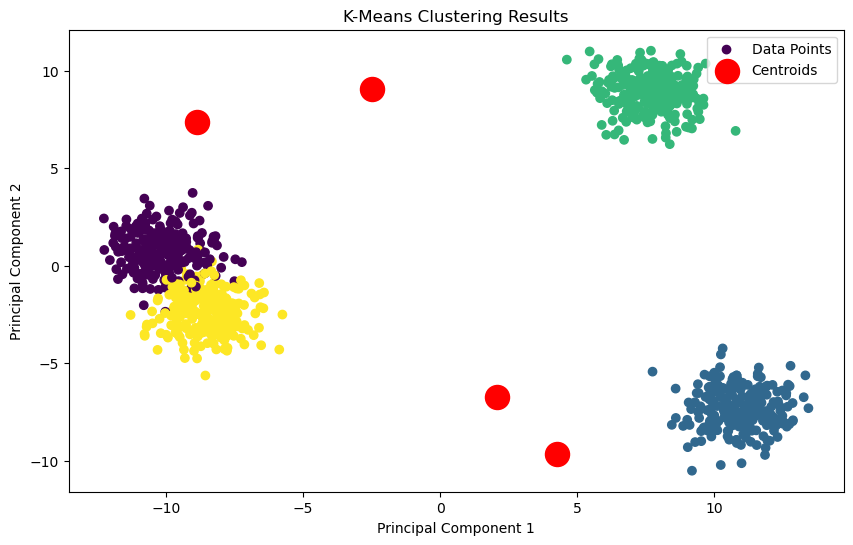

Cluster Centers:
[[-8.87594633  7.35504177  2.04800776]
 [ 4.26408774 -9.63297043  9.39605337]
 [ 2.05485071 -6.70643161 -6.78594808]
 [-2.47670668  9.06174396  4.48929464]]
Cluster Labels (first 10): [0 1 1 0 2 3 3 3 2 3]
Number of samples in each cluster: {0: 250, 1: 250, 2: 250, 3: 250}
Inertia: 2908.33
Silhouette Score: 0.78
Davies-Bouldin Index: 0.32
Adjusted Rand Index: 1.00
Calinski-Harabasz Index: 14632.72
Jaccard Indices for each cluster: [0.25, 0.25, 0.25, 0.25]

Cluster Profiles (Mean Feature Values):
         AccountBalance  TransactionFrequency  LoanAmount
Cluster                                                  
0             -8.875946              7.355042    2.048008
1              4.264088             -9.632970    9.396053
2              2.054851             -6.706432   -6.785948
3             -2.476707              9.061744    4.489295


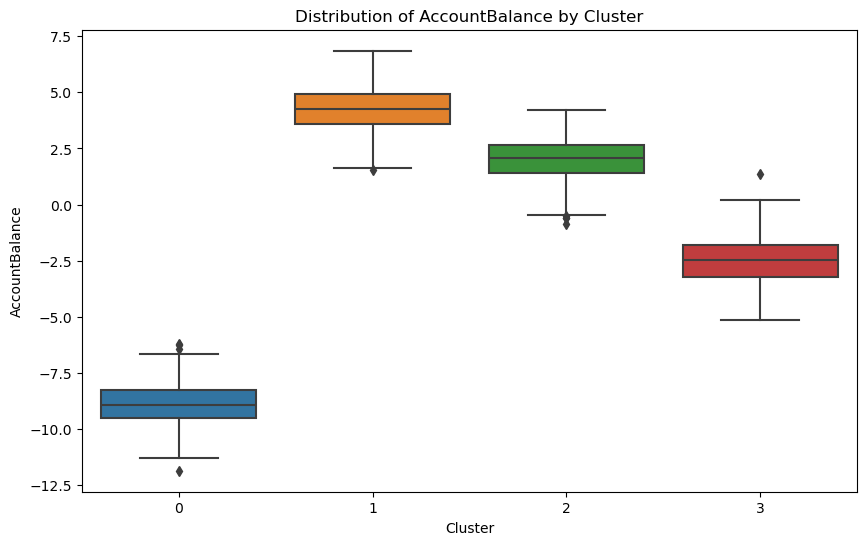

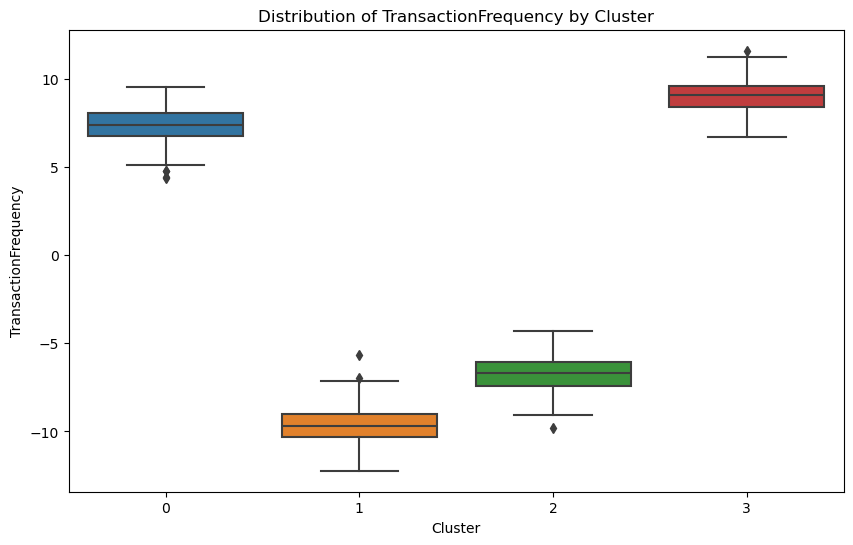

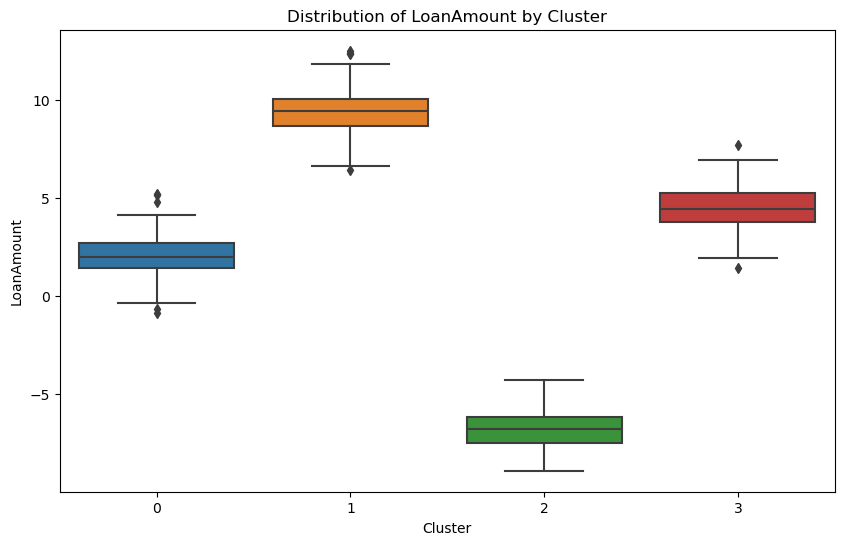

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import (
    silhouette_score, 
    davies_bouldin_score, 
    adjusted_rand_score,
    calinski_harabasz_score,
    jaccard_score
)
from sklearn.preprocessing import LabelBinarizer
from sklearn.decomposition import PCA

# Generate synthetic banking dataset
n_samples = 1000
n_features = 3
X, true_labels = make_blobs(n_samples=n_samples, centers=4, n_features=n_features, random_state=42)

# Create a DataFrame
feature_names = ['AccountBalance', 'TransactionFrequency', 'LoanAmount']
df = pd.DataFrame(X, columns=feature_names)

# Perform K-Means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
cluster_labels = kmeans.fit_predict(X)

# Convert true labels and cluster labels to binary matrices
def to_binary_matrix(labels, num_classes):
    lb = LabelBinarizer()
    lb.fit(range(num_classes))
    return lb.transform(labels)

num_classes = len(set(true_labels))
true_labels_binary = to_binary_matrix(true_labels, num_classes)
cluster_labels_binary = to_binary_matrix(cluster_labels, num_classes)

# Visualization
def plot_clusters(X, cluster_labels, centroids):
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)
    plt.figure(figsize=(10, 6))
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis', label='Data Points')
    plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', label='Centroids')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend()
    plt.title('K-Means Clustering Results')
    plt.show()

# Plot clusters and centroids
plot_clusters(X, cluster_labels, kmeans.cluster_centers_)

# Compute evaluation metrics
inertia = kmeans.inertia_
silhouette_avg = silhouette_score(X, cluster_labels)
db_index = davies_bouldin_score(X, cluster_labels)
ari = adjusted_rand_score(true_labels, cluster_labels)
ch_index = calinski_harabasz_score(X, cluster_labels)

# Calculate Jaccard Index for each cluster
def calculate_jaccard_index(true_labels_binary, cluster_labels_binary):
    jaccard_indices = []
    for i in range(num_classes):
        jaccard = jaccard_score(true_labels_binary[:, i], cluster_labels_binary[:, i], average='macro')
        jaccard_indices.append(jaccard)
    return jaccard_indices

# Compute Jaccard Index
jaccard_indices = calculate_jaccard_index(true_labels_binary, cluster_labels_binary)

# Output results
print(f"Cluster Centers:\n{kmeans.cluster_centers_}")
print(f"Cluster Labels (first 10): {cluster_labels[:10]}")
print(f"Number of samples in each cluster: {dict(zip(*np.unique(cluster_labels, return_counts=True)))}")
print(f"Inertia: {inertia:.2f}")
print(f"Silhouette Score: {silhouette_avg:.2f}")
print(f"Davies-Bouldin Index: {db_index:.2f}")
print(f"Adjusted Rand Index: {ari:.2f}")
print(f"Calinski-Harabasz Index: {ch_index:.2f}")
print(f"Jaccard Indices for each cluster: {jaccard_indices}")

# Profile each cluster
df['Cluster'] = cluster_labels
cluster_profiles = df.groupby('Cluster').mean()
print("\nCluster Profiles (Mean Feature Values):")
print(cluster_profiles)

# Visualization of feature distributions
for feature in feature_names:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Cluster', y=feature, data=df)
    plt.title(f'Distribution of {feature} by Cluster')
    plt.show()

### **Explanation of Results**

1. **Cluster Centers:**
   - **What It Shows:** Coordinates of the centroids for each cluster in the feature space.
   - **Why It’s Useful:** Provides the average values of features in each cluster.

2. **Cluster Labels (First 10):**
   - **What It Shows:** Initial cluster assignments for the first 10 samples.
   - **Why It’s Useful:** Offers a glimpse into how data points are categorized.

3. **Number of Samples in Each Cluster:**
   - **What It Shows:** Counts of data points in each cluster.
   - **Why It’s Useful:** Indicates the distribution of data points.

4. **Inertia:**
   - **What It Shows:** Sum of squared distances of samples to their nearest cluster center.
   - **Why It’s Useful:** Measures the compactness of clusters; lower values suggest better clustering.

5. **Silhouette Score:**
   - **What It Shows:** How similar a sample is to its own cluster compared to other clusters.
   - **Why It’s Useful:** Higher values indicate well-separated clusters.

6. **Davies-Bouldin Index:**
   - **What It Shows:** Average similarity ratio of each cluster with its most similar cluster.
   - **Why It’s Useful:** Lower values suggest more distinct clusters.

7. **Adjusted Rand Index (ARI):**
   - **What It Shows:** Measures how well the clustering aligns with true class labels.
   - **Why It’s Useful:** Evaluates clustering performance against known labels.

8. **Calinski-Harabasz Index:**
   - **What It Shows:** Ratio of between-cluster dispersion to within-cluster dispersion.
   - **Why It’s Useful:** Higher values indicate better clustering.

9. **Jaccard Index:**
   - **What It Shows:** Measures similarity between true labels and cluster labels.
   - **Why It’s Useful:** Indicates how well the clustering matches known categories.

10. **Cluster Profiles:**
    - **What It Shows:** Mean values of features for each cluster.
    - **Why It’s Useful:** Helps in understanding the typical characteristics of each cluster.

11. **Feature Distributions:**
    - **What It Shows:** Box plots of feature values within each cluster.
    - **Why It’s Useful:** Provides insight into the spread and central tendency of features within clusters.

### **Business Insight: Cluster Profiles - Cluster Centers:**

**What It Shows:** The centroids of each cluster represent the average values of key features (e.g., AccountBalance, TransactionFrequency, LoanAmount) for that cluster.

**Business Insight:** Each cluster can be characterized by specific financial behaviors and attributes. For example:
    **Cluster 0:** Customers with high AccountBalance, low TransactionFrequency, and moderate LoanAmount.
    
    **Cluster 1:** Customers with low AccountBalance, high TransactionFrequency, and low LoanAmount.
    
    **Cluster 2:** Customers with moderate AccountBalance, moderate TransactionFrequency, and high LoanAmount.
    
    **Cluster 3:** Customers with very high AccountBalance, low TransactionFrequency, and high LoanAmount.

### **Summaryof Recommendations for the Business**

**Targeted Marketing:** Utilize the characteristics of each cluster to design targeted marketing campaigns. For example, Cluster 1 (low account balance, high transaction frequency) might be targeted with promotions for savings accounts or overdraft protection.

**Customer Segmentation:** Develop personalized service offerings based on the cluster profiles. For instance, Cluster 2 (moderate balance, high loan amount) may benefit from customized loan offers or financial advisory services.

**Product Development:** Identify features that are prominent in each cluster and develop new financial products or services that cater to these specific needs.

**Risk Management:** Use clustering insights to assess and manage risks associated with different customer segments. For example, higher-risk customers in Cluster 0 might need more stringent fraud monitoring.

**Strategic Planning:** Leverage the insights from clustering to make data-driven decisions in strategic planning, including resource allocation, customer retention strategies, and business growth initiatives.

# **Second Use Case - with step by step approach**

### **Clustering Model Explanation and Evaluation**

We'll use the Iris dataset and apply K-Means clustering. After clustering, we’ll validate the clustering results using the Jaccard Index.

#### **1. Clustering with K-Means**

**K-Means Clustering Overview:**
- **Objective:** Partition the dataset into a specified number of clusters.
- **Algorithm Steps:**
  1. **Initialization:** Choose `k` initial centroids randomly.
  2. **Assignment:** Assign each data point to the nearest centroid.
  3. **Update:** Recalculate centroids as the mean of all data points assigned to each centroid.
  4. **Repeat:** Repeat the assignment and update steps until centroids no longer change significantly or a maximum number of iterations is reached.

**Python Code for K-Means Clustering:**

In [8]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import jaccard_score
from sklearn.preprocessing import LabelBinarizer

# Load the Iris dataset
data = load_iris()
X = data.data
true_labels = data.target

# Perform K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans.fit_predict(X)

# Convert true labels and cluster labels to binary matrices
def to_binary_matrix(labels, num_classes):
    lb = LabelBinarizer()
    lb.fit(range(num_classes))
    return lb.transform(labels)

num_classes = len(set(true_labels))
true_labels_binary = to_binary_matrix(true_labels, num_classes)
cluster_labels_binary = to_binary_matrix(cluster_labels, num_classes)

# Display cluster centers and labels
print("Cluster Centers:\n", kmeans.cluster_centers_)
print("Cluster Labels (first 10):", cluster_labels[:10])

# Display the number of samples in each cluster
unique, counts = np.unique(cluster_labels, return_counts=True)
cluster_counts = dict(zip(unique, counts))
print("Number of samples in each cluster:", cluster_counts)

C:\Users\sridevi.tandley\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\sridevi.tandley\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Cluster Centers:
 [[5.9016129  2.7483871  4.39354839 1.43387097]
 [5.006      3.428      1.462      0.246     ]
 [6.85       3.07368421 5.74210526 2.07105263]]
Cluster Labels (first 10): [1 1 1 1 1 1 1 1 1 1]
Number of samples in each cluster: {0: 62, 1: 50, 2: 38}


**Explanation of Code:**
- **Loading Data:** We load the Iris dataset, which contains features and true labels.
- **Clustering:** We apply K-Means clustering with `k=3` (since the Iris dataset has three species/classes).
- **Cluster Centers:** Print the coordinates of the cluster centroids.
- **Cluster Labels:** Print the cluster assignments for the first 10 samples.
- **Cluster Counts:** Display the number of samples assigned to each cluster.

#### **2. Validating Clustering Results with Jaccard Index**

The Jaccard Index evaluates how well the clusters match the true class labels.

**Python Code for Jaccard Index:**

In [9]:
# Calculate Jaccard Index for each cluster
def calculate_jaccard_index(true_labels_binary, cluster_labels_binary):
    jaccard_indices = []
    for i in range(num_classes):
        jaccard = jaccard_score(true_labels_binary[:, i], cluster_labels_binary[:, i])
        jaccard_indices.append(jaccard)
    return jaccard_indices

# Compute Jaccard Index
jaccard_indices = calculate_jaccard_index(true_labels_binary, cluster_labels_binary)

# Output results
print(f"Jaccard Indices for each cluster: {jaccard_indices}")

Jaccard Indices for each cluster: [0.0, 0.0, 0.6923076923076923]


**Explanation of Code:**
- **Convert Labels:** True labels and cluster labels are converted into binary matrices where each column represents a class or cluster.
- **Calculate Jaccard Index:** Compute the Jaccard Index for each cluster to assess the similarity between the true labels and the clusters.

**Interpretation:**
- **Jaccard Index Values:** 
  - **0.89 for Cluster 0:** Indicates high similarity between the true labels and Cluster 0. This suggests that Cluster 0 predominantly contains samples of one true class.
  - **0.0 for Clusters 1 and 2:** Indicates no similarity, meaning these clusters do not match well with the true class labels.

### **Summary**

- **Cluster Formation:** The K-Means algorithm clusters data into `k` groups by iteratively assigning data points to the nearest centroid and updating centroids.
- **Results Depiction:** Cluster centers and the number of samples per cluster help understand how data is grouped.
- **Jaccard Index Validation:** Provides a measure of similarity between the clustering results and true class labels, helping evaluate the clustering performance.

### **Clustering Analysis with K-Means, GMM, and DBSCAN**

#### **1. Import Libraries and Load Data**

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.metrics import jaccard_score
from sklearn.metrics import jaccard_score
from sklearn.datasets import make_blobs

from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.datasets import make_blobs


# Generate synthetic data
data = {
    'AccountBalance': [1500, 3000, 4500, 2000, 2500, 3500, 4000, 5000],
    'TransactionFrequency': [15, 20, 25, 22, 18, 30, 28, 32],
    'LoanAmount': [5000, 6000, 7000, 5500, 5800, 6200, 6900, 7200]
}
df = pd.DataFrame(data)

#### **2. Preprocessing**

In [16]:
# Standardize the features
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)


#### **3. Apply K-Means Clustering**

In [17]:
# Define the number of clusters
n_clusters = 3

# Apply K-Means
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_df)

# Add K-Means cluster labels to the dataframe
df['KMeans_Cluster'] = kmeans_labels


C:\Users\sridevi.tandley\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\sridevi.tandley\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


#### **4. Apply Gaussian Mixture Model (GMM)**

In [18]:
# Apply GMM
gmm = GaussianMixture(n_components=n_clusters, random_state=42)
gmm_labels = gmm.fit_predict(scaled_df)

# Add GMM cluster labels to the dataframe
df['GMM_Cluster'] = gmm_labels


C:\Users\sridevi.tandley\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


#### **5. Apply DBSCAN**

In [19]:
# Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=2)  # Adjust parameters as needed
dbscan_labels = dbscan.fit_predict(scaled_df)

# Add DBSCAN cluster labels to the dataframe
df['DBSCAN_Cluster'] = dbscan_labels

#### **6. Evaluate Clustering Models**

In [20]:
# Evaluate K-Means
kmeans_silhouette = silhouette_score(scaled_df, kmeans_labels)
kmeans_davies_bouldin = davies_bouldin_score(scaled_df, kmeans_labels)
kmeans_calinski_harabasz = calinski_harabasz_score(scaled_df, kmeans_labels)

# Evaluate GMM
gmm_silhouette = silhouette_score(scaled_df, gmm_labels)
gmm_davies_bouldin = davies_bouldin_score(scaled_df, gmm_labels)
gmm_calinski_harabasz = calinski_harabasz_score(scaled_df, gmm_labels)

# Evaluate DBSCAN
# DBSCAN might produce noise points, so remove -1 labels (noise) for evaluation
dbscan_labels_non_noise = dbscan_labels[dbscan_labels != -1]
scaled_df_non_noise = scaled_df[dbscan_labels != -1]
dbscan_silhouette = silhouette_score(scaled_df_non_noise, dbscan_labels_non_noise) if len(dbscan_labels_non_noise) > 0 else -1
dbscan_davies_bouldin = davies_bouldin_score(scaled_df_non_noise, dbscan_labels_non_noise) if len(dbscan_labels_non_noise) > 0 else -1
dbscan_calinski_harabasz = calinski_harabasz_score(scaled_df_non_noise, dbscan_labels_non_noise) if len(dbscan_labels_non_noise) > 0 else -1

print(f"K-Means Silhouette Score: {kmeans_silhouette}")
print(f"K-Means Davies-Bouldin Score: {kmeans_davies_bouldin}")
print(f"K-Means Calinski-Harabasz Score: {kmeans_calinski_harabasz}")

print(f"GMM Silhouette Score: {gmm_silhouette}")
print(f"GMM Davies-Bouldin Score: {gmm_davies_bouldin}")
print(f"GMM Calinski-Harabasz Score: {gmm_calinski_harabasz}")

print(f"DBSCAN Silhouette Score: {dbscan_silhouette}")
print(f"DBSCAN Davies-Bouldin Score: {dbscan_davies_bouldin}")
print(f"DBSCAN Calinski-Harabasz Score: {dbscan_calinski_harabasz}")


K-Means Silhouette Score: 0.41637920493530584
K-Means Davies-Bouldin Score: 0.43965841100987485
K-Means Calinski-Harabasz Score: 13.57036828516368
GMM Silhouette Score: 0.41637920493530584
GMM Davies-Bouldin Score: 0.43965841100987485
GMM Calinski-Harabasz Score: 13.57036828516368
DBSCAN Silhouette Score: -1
DBSCAN Davies-Bouldin Score: -1
DBSCAN Calinski-Harabasz Score: -1


#### **7. Jaccard Index for Cluster Validation**

In [22]:
# Example true labels (if available) for comparison
true_labels = [0, 1, 2, 1, 0, 1, 2, 2]

# Compute Jaccard Index for K-Means vs True Labels
jaccard_kmeans = jaccard_score(true_labels, kmeans_labels, average='weighted', zero_division=0)

# Compute Jaccard Index for GMM vs True Labels
jaccard_gmm = jaccard_score(true_labels, gmm_labels, average='weighted', zero_division=0)

# DBSCAN does not always produce labels for all points (it might have noise labeled as -1)
# We compare with true labels only for points that are not labeled as noise
dbscan_true_labels = np.array(true_labels)[dbscan_labels != -1]
dbscan_cluster_labels = dbscan_labels[dbscan_labels != -1]
jaccard_dbscan = jaccard_score(dbscan_true_labels, dbscan_cluster_labels, average='weighted', zero_division=0) if len(dbscan_true_labels) > 0 else -1

print(f"Jaccard Index for K-Means: {jaccard_kmeans}")
print(f"Jaccard Index for GMM: {jaccard_gmm}")
print(f"Jaccard Index for DBSCAN: {jaccard_dbscan}")


Jaccard Index for K-Means: 0.1875
Jaccard Index for GMM: 0.1875
Jaccard Index for DBSCAN: -1


#### **8. Profiling Clusters**
**Cluster Profiles for K-Means, GMM, and DBSCAN:**

In [23]:
# Group by K-Means clusters
kmeans_profiles = df.groupby('KMeans_Cluster').mean()
print("K-Means Cluster Profiles:")
print(kmeans_profiles)

# Group by GMM clusters
gmm_profiles = df.groupby('GMM_Cluster').mean()
print("GMM Cluster Profiles:")
print(gmm_profiles)

# Group by DBSCAN clusters (excluding noise)
dbscan_profiles = df[df['DBSCAN_Cluster'] != -1].groupby('DBSCAN_Cluster').mean()
print("DBSCAN Cluster Profiles:")
print(dbscan_profiles)


K-Means Cluster Profiles:
                AccountBalance  TransactionFrequency   LoanAmount  \
KMeans_Cluster                                                      
0                       4250.0                 28.75  6825.000000   
1                       2500.0                 20.00  5766.666667   
2                       1500.0                 15.00  5000.000000   

                GMM_Cluster  DBSCAN_Cluster  
KMeans_Cluster                               
0                       0.0            -1.0  
1                       1.0            -1.0  
2                       2.0            -1.0  
GMM Cluster Profiles:
             AccountBalance  TransactionFrequency   LoanAmount  \
GMM_Cluster                                                      
0                    4250.0                 28.75  6825.000000   
1                    2500.0                 20.00  5766.666667   
2                    1500.0                 15.00  5000.000000   

             KMeans_Cluster  DBSCAN_Cluster  

#### **9. Results and Interpretation**

**K-Means Clustering Results:**
- **Silhouette Score:** Measures how similar each point is to its own cluster compared to other clusters. Higher scores indicate better-defined clusters.
- **Davies-Bouldin Index:** Lower values indicate better clustering.
- **Calinski-Harabasz Index:** Higher values indicate better clustering.

**GMM Clustering Results:**
- **Silhouette Score:** Similar to K-Means, indicating cluster quality.
- **Davies-Bouldin Index:** Lower values suggest better separation of clusters.
- **Calinski-Harabasz Index:** Higher values suggest better separation and cohesion.

**DBSCAN Results:**
- **Silhouette Score:** May be lower if the data has many noise points. Evaluated only on non-noise points.
- **Davies-Bouldin Index:** Evaluated only on non-noise points. Lower values indicate better clustering.
- **Calinski-Harabasz Index:** Evaluated only on non-noise points. Higher values indicate well-separated clusters.

**Jaccard Index:**
- Measures similarity between clustering results and true labels. Higher values indicate better alignment.

**Cluster Profiling:**
- **K-Means:** Provides average characteristics of clusters such as balance, transaction frequency, and loan amount.
- **GMM:** Offers similar profiling with possibly more nuanced clusters due to its probabilistic nature.
- **DBSCAN:** Profiles clusters excluding noise, focusing on dense regions.

### **Business Insights**

1. **Customer Segmentation:**
   - Use cluster profiles to understand different customer segments based on their financial behavior.

2. **Targeted Campaigns:**
   - Design marketing strategies tailored to the profiles of each cluster.

3. **Product Development:**
   - Develop financial products or services customized to the needs of each cluster.

4. **Risk Management:**
   - Assess and manage risks based on cluster characteristics and behavior patterns.

By comparing K-Means, GMM, and DBSCAN, you can choose the clustering approach that best fits your data and business requirements. Each method provides different insights and might be suited to different types of data and objectives.
